In [10]:
%matplotlib inline
import pandas as pd
port_seguro_original = pd.read_csv('./data/original_train.csv')
port_seguro_test_original = pd.read_csv('./data/original_test.csv')

In [11]:
def get_empty_columns_and_frequencies(df, empty_value):
    columns_with_empty_value = []
    empty_frequencies = []
    for column in df.columns.values:
        vals = df[column].values
        if empty_value in vals:
            columns_with_empty_value.append(column)
            empty_frequencies.append(len(vals[vals == empty_value]) / float(len(vals)))
    
    return pd.DataFrame({ 'Frequency': empty_frequencies }, index=columns_with_empty_value)

def get_unique_values_for_each_column(df):
    columns = df.columns.values
    unique_values = []
    
    for column in columns:
        unique_values.append(df[column].sort_values().unique())
    
    return pd.DataFrame({ 'Values': unique_values }, index=columns)

,Frequency,FrequencyTest
ps_car_01_cat,0.000180,0.000179
ps_car_02_cat,0.000008,0.000006
ps_car_03_cat,0.690898,0.690972
ps_car_05_cat,0.447825,0.448423
ps_car_07_cat,0.019302,0.019412
ps_car_09_cat,0.000956,0.000982
ps_car_11,0.000008,0.000001
ps_car_12,0.000002,NaN
ps_car_14,0.071605,0.071465
ps_ind_02_cat,0.000363,0.000344


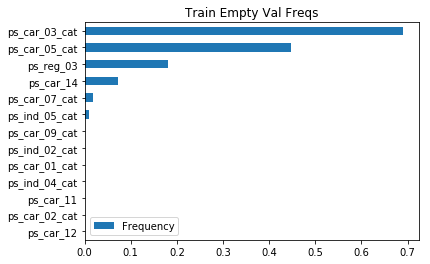

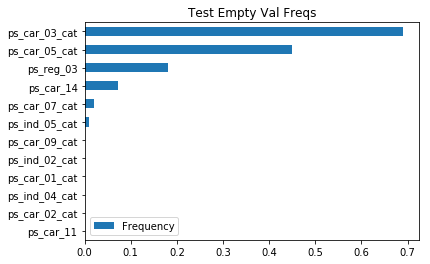

In [12]:
train_freqs = get_empty_columns_and_frequencies(port_seguro_original, -1).sort_values(ascending=True, by='Frequency')
test_freqs = get_empty_columns_and_frequencies(port_seguro_test_original, -1).sort_values(ascending=True, by='Frequency')

train_freqs.plot(kind='barh', use_index=True, title='Train Empty Val Freqs')
test_freqs.plot(kind='barh', use_index=True, title='Test Empty Val Freqs')

train_freqs.join(test_freqs, how='outer', rsuffix='Test')

In [13]:
# Removing the only missing sample with ps_car_12
port_seguro_original = port_seguro_original[port_seguro_original['ps_car_12'] != -1]
# Preparing stratification field
port_seguro_original['ps_car_12_binned'] = pd.cut(port_seguro_original['ps_car_12'], 5, labels=False)
port_seguro_original['stratify'] = port_seguro_original['ps_car_12_binned']
port_seguro_original.loc[port_seguro_original['ps_ind_14'] == 4, 'stratify'] = port_seguro_original['stratify'].max() + 1
port_seguro_original.loc[port_seguro_original['ps_car_11'] == -1, 'stratify'] = port_seguro_original['stratify'].max() + 1

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, random_state=2312, test_size=0.2)

port_seguro_holdout = None
port_seguro_train = None
for train_index, test_index in split.split(port_seguro_original, port_seguro_original['stratify']):
    port_seguro_train = port_seguro_original.iloc[train_index].copy()
    port_seguro_holdout = port_seguro_original.iloc[test_index].copy()

In [15]:
port_seguro_holdout.drop(['ps_car_12_binned', 'stratify'], axis=1, inplace=True)
port_seguro_train.drop(['ps_car_12_binned', 'stratify'], axis=1, inplace=True)

In [16]:
calc_features = [
    'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 
    'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
    'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'
]

port_seguro_holdout.drop(calc_features, axis=1, inplace=True)
port_seguro_train.drop(calc_features, axis=1, inplace=True)
port_seguro_test_original.drop(calc_features, axis=1, inplace=True)

In [17]:
pd.set_option('max_colwidth', 100)
holdout_uniques = get_unique_values_for_each_column(port_seguro_holdout)
train_uniques = get_unique_values_for_each_column(port_seguro_train)
holdout_uniques.join(train_uniques, rsuffix='Train').drop(['id', 'target'], axis=0)

,Values,ValuesTrain
ps_ind_01,"[0, 1, 2, 3, 4, 5, 6, 7]","[0, 1, 2, 3, 4, 5, 6, 7]"
ps_ind_02_cat,"[-1, 1, 2, 3, 4]","[-1, 1, 2, 3, 4]"
ps_ind_03,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"
ps_ind_04_cat,"[-1, 0, 1]","[-1, 0, 1]"
ps_ind_05_cat,"[-1, 0, 1, 2, 3, 4, 5, 6]","[-1, 0, 1, 2, 3, 4, 5, 6]"
ps_ind_06_bin,"[0, 1]","[0, 1]"
ps_ind_07_bin,"[0, 1]","[0, 1]"
ps_ind_08_bin,"[0, 1]","[0, 1]"
ps_ind_09_bin,"[0, 1]","[0, 1]"
ps_ind_10_bin,"[0, 1]","[0, 1]"


In [18]:
port_seguro_holdout.to_csv('./data/holdout.csv', index=False)
port_seguro_train.to_csv('./data/train.csv', index=False)
port_seguro_test_original.to_csv('./data/test.csv', index=False)